In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
#yeni kütüphane ekledikten sonra çalıştırmayı unutmayın

In [59]:
#veri setini ekleyelim
df=pd.read_csv("houses_Madrid.csv")
#veri setinin ilk 10 satırını gösterelim
df.head(10)

,Unnamed: 0,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,...,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
0,0,21742,"Piso en venta en calle de Godella, 64","San Cristóbal, Madrid",64.0,60.0,2,1.0,NaN,NaN,...,D,False,NaN,NaN,NaN,NaN,False,True,False,False
1,1,21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ángeles, Madrid",70.0,NaN,3,1.0,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,21740,"Piso en venta en calle del Talco, 68","San Andrés, Madrid",94.0,54.0,2,2.0,NaN,NaN,...,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,21739,Piso en venta en calle Pedro Jiménez,"San Andrés, Madrid",64.0,NaN,2,1.0,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,False,False,True,False
4,4,21738,Piso en venta en carretera de Villaverde a Val...,"Los Rosales, Madrid",108.0,90.0,2,2.0,NaN,NaN,...,en trámite,True,NaN,NaN,True,0.0,True,True,True,True
5,5,21737,Piso en venta en geologia,"San Andrés, Madrid",126.0,114.0,4,2.0,NaN,NaN,...,en trámite,True,NaN,NaN,True,0.0,False,False,False,True
6,6,21736,Piso en venta en avenida Real de Pinto,"San Andrés, Madrid",120.0,100.0,5,2.0,NaN,NaN,...,F,True,NaN,NaN,True,0.0,False,False,True,False
7,7,21735,Piso en venta en San Andrés,"Villaverde, Madrid",125.0,100.0,3,2.0,NaN,NaN,...,no indicado,False,NaN,NaN,NaN,NaN,False,False,True,False
8,8,21734,Piso en venta en Butarque,"Villaverde, Madrid",84.0,70.0,3,2.0,NaN,NaN,...,F,True,NaN,NaN,True,0.0,NaN,NaN,NaN,NaN
9,9,21733,Piso en venta en calle de Martinez Oviol,"Los Rosales, Madrid",85.0,NaN,2,1.0,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,False,True,False,False


In [29]:
#veri setinin kaç satır ve sütundan oluştuğuna bakalım
df.shape

(21742, 58)

In [30]:
#veri setinin toplam kaç veriden oluştuğuna bakalım (21742 x 58)
df.size

1261036

In [31]:
#veri setini inceleyelim (kaç sütun var, veri türleri neler)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 58 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    21742 non-null  int64  
 1   id                            21742 non-null  int64  
 2   title                         21742 non-null  object 
 3   subtitle                      21742 non-null  object 
 4   sq_mt_built                   21616 non-null  float64
 5   sq_mt_useful                  8228 non-null   float64
 6   n_rooms                       21742 non-null  int64  
 7   n_bathrooms                   21726 non-null  float64
 8   n_floors                      1437 non-null   float64
 9   sq_mt_allotment               1432 non-null   float64
 10  latitude                      0 non-null      float64
 11  longitude                     0 non-null      float64
 12  raw_address                   16277 non-null  object 
 13  i

In [32]:
#veri setrindeki özniteliklere ait toplam veri sayısı, verilerin ortalaması minimum değerleri gibi bilgilerini inceleyelim
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,21742.0,10870.500000,6276.519112,0.0,5435.25,10870.5,16305.75,21741.0
id,21742.0,10871.500000,6276.519112,1.0,5436.25,10871.5,16306.75,21742.0
sq_mt_built,21616.0,146.920892,134.181865,13.0,70.00,100.0,162.00,999.0
sq_mt_useful,8228.0,103.458192,88.259192,1.0,59.00,79.0,113.00,998.0
n_rooms,21742.0,3.005749,1.510497,0.0,2.00,3.0,4.00,24.0
n_bathrooms,21726.0,2.091687,1.406992,1.0,1.00,2.0,2.00,16.0
n_floors,1437.0,3.128740,0.907713,1.0,2.00,3.0,4.00,7.0
sq_mt_allotment,1432.0,241.692737,247.484853,1.0,2.00,232.0,354.00,997.0
latitude,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
longitude,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
#veri setinde her bir sütunda toplam kaç adet boş değer var bakalım
df.isnull().sum()

Unnamed: 0                          0
id                                  0
title                               0
subtitle                            0
sq_mt_built                       126
sq_mt_useful                    13514
n_rooms                             0
n_bathrooms                        16
n_floors                        20305
sq_mt_allotment                 20310
latitude                        21742
longitude                       21742
raw_address                      5465
is_exact_address_hidden             0
street_name                      5905
street_number                   15442
portal                          21742
floor                            2607
is_floor_under                   1170
door                            21742
neighborhood_id                     0
operation                           0
rent_price                          0
rent_price_by_area              21742
is_rent_price_known                 0
buy_price                           0
buy_price_by

In [34]:
#çok fazla null değere sahip bir sütunu inceleyelim
df["rent_price_by_area"].info() 

<class 'pandas.core.series.Series'>
RangeIndex: 21742 entries, 0 to 21741
Series name: rent_price_by_area
Non-Null Count  Dtype  
--------------  -----  
0 non-null      float64
dtypes: float64(1)
memory usage: 170.0 KB


In [35]:
#boş değer sayısı fazla olan sütunları veri setinden kaldıralım.
#df= dememizin sebei drop ile kaldırılan sütunların veri setinden kalıcı olarak silinmesi içindir. Bunun yerine inplace=True da kullanılabilirdi.

df=df.drop(columns=["sq_mt_useful","n_floors","sq_mt_allotment","latitude","longitude","raw_address","street_number","portal","door","rent_price_by_area","is_orientation_north","is_orientation_west","is_orientation_south","is_orientation_east","are_pets_allowed","is_furnished","is_kitchen_equipped","has_public_parking","has_private_parking","parking_price"])
#bu satırı bir kez çalıştırdığınızda sütunlar kalıcı olarak kaldırılacağı için tekrar çalıştırıldığında sütunları bulamadığı için hata verecektir.

In [36]:
#yeni durumda veri setini inceleyelim. Sütun sayısı azaldı mı?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    21742 non-null  int64  
 1   id                            21742 non-null  int64  
 2   title                         21742 non-null  object 
 3   subtitle                      21742 non-null  object 
 4   sq_mt_built                   21616 non-null  float64
 5   n_rooms                       21742 non-null  int64  
 6   n_bathrooms                   21726 non-null  float64
 7   is_exact_address_hidden       21742 non-null  bool   
 8   street_name                   15837 non-null  object 
 9   floor                         19135 non-null  object 
 10  is_floor_under                20572 non-null  object 
 11  neighborhood_id               21742 non-null  object 
 12  operation                     21742 non-null  object 
 13  r

In [37]:
#makaleye göre is_rent_price_known sütununu inceleyelim
df["is_rent_price_known"]

0        False
1        False
2        False
3        False
4        False
         ...  
21737    False
21738    False
21739    False
21740    False
21741    False
Name: is_rent_price_known, Length: 21742, dtype: bool

In [38]:
#veri türü bool olduğu için yalnızca true ya da false değeri alabilir
#o zaman False dışında bir değer var mı kontrol edelim
df[df["is_rent_price_known"]!=False]

,Unnamed: 0,id,title,subtitle,sq_mt_built,n_rooms,n_bathrooms,is_exact_address_hidden,street_name,floor,...,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,is_accessible,has_green_zones,energy_certificate,has_parking,is_parking_included_in_price


In [39]:
#Makalede de dediği gibi hepsi aynı değere sahip olduğu için bu sütunu da silelim
df.drop(["is_rent_price_known"],axis=1, inplace=True)

In [40]:
df.info() #bbir sütun daha silindi. veri setini tekrar inceleyelim

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    21742 non-null  int64  
 1   id                            21742 non-null  int64  
 2   title                         21742 non-null  object 
 3   subtitle                      21742 non-null  object 
 4   sq_mt_built                   21616 non-null  float64
 5   n_rooms                       21742 non-null  int64  
 6   n_bathrooms                   21726 non-null  float64
 7   is_exact_address_hidden       21742 non-null  bool   
 8   street_name                   15837 non-null  object 
 9   floor                         19135 non-null  object 
 10  is_floor_under                20572 non-null  object 
 11  neighborhood_id               21742 non-null  object 
 12  operation                     21742 non-null  object 
 13  r

In [41]:
df.head(10).T


,0,1,2,3,4,5,6,7,8,9
Unnamed: 0,0,1,2,3,4,5,6,7,8,9
id,21742,21741,21740,21739,21738,21737,21736,21735,21734,21733
title,"Piso en venta en calle de Godella, 64",Piso en venta en calle de la del Manojo de Rosas,"Piso en venta en calle del Talco, 68",Piso en venta en calle Pedro Jiménez,Piso en venta en carretera de Villaverde a Val...,Piso en venta en geologia,Piso en venta en avenida Real de Pinto,Piso en venta en San Andrés,Piso en venta en Butarque,Piso en venta en calle de Martinez Oviol
subtitle,"San Cristóbal, Madrid","Los Ángeles, Madrid","San Andrés, Madrid","San Andrés, Madrid","Los Rosales, Madrid","San Andrés, Madrid","San Andrés, Madrid","Villaverde, Madrid","Villaverde, Madrid","Los Rosales, Madrid"
sq_mt_built,64.0,70.0,94.0,64.0,108.0,126.0,120.0,125.0,84.0,85.0
n_rooms,2,3,2,2,2,4,5,3,3,2
n_bathrooms,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0
is_exact_address_hidden,False,True,False,True,True,True,True,True,True,True
street_name,Calle de Godella,Calle de la del Manojo de Rosas,Calle del Talco,Calle Pedro Jiménez,Carretera de Villaverde a Vallecas,geologia,Avenida Real de Pinto,NaN,NaN,Calle de Martinez Oviol
floor,3,4,1,Bajo,4,3,1,2,NaN,7


In [42]:
#Anlamsız değer bulunan kayıtların silinmesi (örneğin negatif fiyat değeri içeren kayıtlar)
df[df["rent_price"]<0].T # .T (transpose) satır ve sütunların yer değiştirmesi için kullanılır.


,2499,2516,2517,2531,2560,2583,2584,2591,2694,2699,...,21664,21665,21668,21670,21673,21675,21676,21677,21680,21681
Unnamed: 0,2499,2516,2517,2531,2560,2583,2584,2591,2694,2699,...,21664,21665,21668,21670,21673,21675,21676,21677,21680,21681
id,19243,19226,19225,19211,19182,19159,19158,19151,19048,19043,...,78,77,74,72,69,67,66,65,62,61
title,Dúplex en venta en Cuatro Caminos,Ático en venta en paseo de la Castellana,Dúplex en venta en Cuzco-Castillejos,Ático en venta en Cuatro Caminos,Piso en venta en plaza de Manolete,Piso en venta en Cuatro Caminos,Estudio en venta en Cuzco-Castillejos,Ático en venta en calle del Poeta Joan Maragall,Piso en venta en avenida del General Perón,Piso en venta en paseo de la Castellana,...,Piso en venta en Nueva España,Piso en venta en calle maria de molina,Piso en venta en El Viso,Piso en venta en calle de María de Molina,Casa o chalet independiente en venta en calle...,Chalet adosado en venta en Nueva España,Piso en venta en El Viso,Chalet adosado en venta en El Viso,Chalet adosado en venta en El Viso,Piso en venta en paseo del Prado
subtitle,"Tetuán, Madrid","Cuatro Caminos, Madrid","Tetuán, Madrid","Tetuán, Madrid","Cuatro Caminos, Madrid","Tetuán, Madrid","Tetuán, Madrid","Cuatro Caminos, Madrid","Cuatro Caminos, Madrid","Cuatro Caminos, Madrid",...,"Chamartín, Madrid","El Viso, Madrid","Chamartín, Madrid","El Viso, Madrid","El Viso, Madrid","Chamartín, Madrid","Chamartín, Madrid","Chamartín, Madrid","Chamartín, Madrid","Huertas-Cortes, Madrid"
sq_mt_built,257.0,257.0,295.0,257.0,203.0,200.0,300.0,257.0,360.0,203.0,...,379.0,399.0,432.0,399.0,469.0,351.0,220.0,432.0,395.0,230.0
n_rooms,3,3,4,3,4,4,0,3,5,4,...,5,5,6,5,5,4,4,2,4,4
n_bathrooms,3.0,4.0,4.0,4.0,4.0,3.0,1.0,4.0,4.0,4.0,...,4.0,4.0,5.0,5.0,6.0,5.0,3.0,3.0,4.0,2.0
is_exact_address_hidden,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
street_name,NaN,Paseo de la Castellana,NaN,NaN,Plaza de Manolete,NaN,NaN,Calle del Poeta Joan Maragall,Avenida del General Perón,Paseo de la Castellana,...,NaN,Calle maria de molina,NaN,Calle de María de Molina,Calle Alfonso Rodríguez Santamaría,NaN,NaN,NaN,NaN,Paseo del Prado
floor,1,1,5,1,1,1,Bajo,1,6,1,...,2,7,2,7,NaN,NaN,4,NaN,NaN,5


In [43]:
#rent_price sütununda negatif değerler olduğunu gördük bunları silelim
#daha doğrusu sıfırdan büyük olan değerleri dataframe'e aktaralım.
df=df.loc[df["rent_price"]>0]

In [44]:
#aynı işlemi buy_price için de yapalım
df=df.loc[df["buy_price"]>0]


**Birbirinin aynısı veya benzeri olan özelliklerden sadece birer tanesinin kullanılması
diğerlerinin silinmesi (örneğin sq_mt_built saklanırken, sq_mt_allotment ve
sq_mt_useful silind**i)

In [45]:
#Veri setini tekrar inceleyelim
df.T


,0,1,2,3,4,5,6,7,8,9,...,21732,21733,21734,21735,21736,21737,21738,21739,21740,21741
Unnamed: 0,0,1,2,3,4,5,6,7,8,9,...,21732,21733,21734,21735,21736,21737,21738,21739,21740,21741
id,21742,21741,21740,21739,21738,21737,21736,21735,21734,21733,...,10,9,8,7,6,5,4,3,2,1
title,"Piso en venta en calle de Godella, 64",Piso en venta en calle de la del Manojo de Rosas,"Piso en venta en calle del Talco, 68",Piso en venta en calle Pedro Jiménez,Piso en venta en carretera de Villaverde a Val...,Piso en venta en geologia,Piso en venta en avenida Real de Pinto,Piso en venta en San Andrés,Piso en venta en Butarque,Piso en venta en calle de Martinez Oviol,...,Piso en venta en calle Júpiter,Casa o chalet independiente en venta en aveni...,Piso en venta en calle Galeón,Piso en venta en calle Bahía de Almería,Piso en venta en calle Bahía de Alicante,Ático en venta en Casco Histórico de Barajas,Piso en venta en Urb. Campo de las Naciones - ...,Piso en venta en Campo de las Naciones-Corralejos,"Chalet adosado en venta en calle Burriana, 12","Piso en venta en calle San Epifanio, 9"
subtitle,"San Cristóbal, Madrid","Los Ángeles, Madrid","San Andrés, Madrid","San Andrés, Madrid","Los Rosales, Madrid","San Andrés, Madrid","San Andrés, Madrid","Villaverde, Madrid","Villaverde, Madrid","Los Rosales, Madrid",...,"Casco Histórico de Barajas, Madrid","Campo de las Naciones-Corralejos, Madrid","Alameda de Osuna, Madrid","Campo de las Naciones-Corralejos, Madrid","Campo de las Naciones-Corralejos, Madrid","Barajas, Madrid","Barajas, Madrid","Barajas, Madrid","Campo de las Naciones-Corralejos, Madrid","Imperial, Madrid"
sq_mt_built,64.0,70.0,94.0,64.0,108.0,126.0,120.0,125.0,84.0,85.0,...,74.0,267.0,89.0,88.0,99.0,78.0,96.0,175.0,289.0,72.0
n_rooms,2,3,2,2,2,4,5,3,3,2,...,2,5,3,2,2,2,2,4,4,2
n_bathrooms,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,...,1.0,3.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0
is_exact_address_hidden,False,True,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,False,False
street_name,Calle de Godella,Calle de la del Manojo de Rosas,Calle del Talco,Calle Pedro Jiménez,Carretera de Villaverde a Vallecas,geologia,Avenida Real de Pinto,NaN,NaN,Calle de Martinez Oviol,...,Calle Júpiter,Avenida de Logroño,Calle Galeón,Calle Bahía de Almería,Calle Bahía de Alicante,NaN,Urb. Campo de las Naciones - Corralejos,NaN,Calle Burriana,Calle San Epifanio
floor,3,4,1,Bajo,4,3,1,2,NaN,7,...,Entreplanta exterior,NaN,5,1,1,4,3,Bajo,NaN,NaN


In [46]:
#tittle, subtitle, is_exact_address_hidden, neighborhood_id sütunlarını da kaldırabiliriz.
#has_central_heating (merkezi ısıtma) ve has_individual_heating (bireysel ısıtma)	birbirinin tam zıttı biri tru iken diğeri false birini kaldırabiliriz.
df=df.drop(columns=["title","subtitle","is_exact_address_hidden","neighborhood_id","has_individual_heating"])

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19095 entries, 0 to 21741
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    19095 non-null  int64  
 1   id                            19095 non-null  int64  
 2   sq_mt_built                   19095 non-null  float64
 3   n_rooms                       19095 non-null  int64  
 4   n_bathrooms                   19081 non-null  float64
 5   street_name                   14670 non-null  object 
 6   floor                         17596 non-null  object 
 7   is_floor_under                18265 non-null  object 
 8   operation                     19095 non-null  object 
 9   rent_price                    19095 non-null  int64  
 10  buy_price                     19095 non-null  int64  
 11  buy_price_by_area             19095 non-null  int64  
 12  is_buy_price_known            19095 non-null  bool   
 13  house_

**Verilerin derlendiği ilanlarda havuz, teras gibi ek özellikler sadece mevcut
olduğunda belirtildiği için, girilmeyen değerlerin eklenmesi (örneğin sadece “true”
değerleri bulunuyorsa kalan değerler “false” olarak belirlendi)**


**Kategorik değişkenler yerine kukla değişkenler eklenmesi (örneğin
energy_certificate değişkeni)**
**Makine öğrenmesi algoritmaları sayısal veriler ile çalışır bu nedenle kategorik verileri sayısal verilere çevirmeliyiz** 

In [48]:
# has_ac, has_fitted_wardrobes, has_garden, has_pool, has_terrace, has_balcony, has_storage_room, is_accessible, has_green_zones, is_parking_included_in_price
df[['has_ac', 'has_fitted_wardrobes', 'has_garden','has_pool','has_terrace','has_balcony','has_storage_room','is_accessible','has_green_zones','is_parking_included_in_price','has_central_heating']] = df[['has_ac', 'has_fitted_wardrobes', 'has_garden','has_pool','has_terrace','has_balcony','has_storage_room','is_accessible','has_green_zones','is_parking_included_in_price','has_central_heating']].fillna(False)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19095 entries, 0 to 21741
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    19095 non-null  int64  
 1   id                            19095 non-null  int64  
 2   sq_mt_built                   19095 non-null  float64
 3   n_rooms                       19095 non-null  int64  
 4   n_bathrooms                   19081 non-null  float64
 5   street_name                   14670 non-null  object 
 6   floor                         17596 non-null  object 
 7   is_floor_under                18265 non-null  object 
 8   operation                     19095 non-null  object 
 9   rent_price                    19095 non-null  int64  
 10  buy_price                     19095 non-null  int64  
 11  buy_price_by_area             19095 non-null  int64  
 12  is_buy_price_known            19095 non-null  bool   
 13  house_

In [50]:
#bu işlem için chatgpt'den birden fazla sütun için label encoding kullanımı diye aratabilirsiniz
#label encoding için sklearn kütüphanesini ekleyeceğiz.
#kütüphane ekleme işlemlerini ilk satırda yapalım (en üstte)
# LabelEncoder'ı her sütun için uygulama
encoder = LabelEncoder()

for column in ['energy_certificate', 'house_type_id','operation','street_name']:
    df[column] = encoder.fit_transform(df[column])

In [51]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,21732,21733,21734,21735,21736,21737,21738,21739,21740,21741
Unnamed: 0,0,1,2,3,4,5,6,7,8,9,...,21732,21733,21734,21735,21736,21737,21738,21739,21740,21741
id,21742,21741,21740,21739,21738,21737,21736,21735,21734,21733,...,10,9,8,7,6,5,4,3,2,1
sq_mt_built,64.0,70.0,94.0,64.0,108.0,126.0,120.0,125.0,84.0,85.0,...,74.0,267.0,89.0,88.0,99.0,78.0,96.0,175.0,289.0,72.0
n_rooms,2,3,2,2,2,4,5,3,3,2,...,2,5,3,2,2,2,2,4,4,2
n_bathrooms,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,...,1.0,3.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0
street_name,2987,3715,4075,1989,4273,5660,209,5812,5812,3165,...,1614,261,1339,737,736,5812,5363,5812,811,2259
floor,3,4,1,Bajo,4,3,1,2,NaN,7,...,Entreplanta exterior,NaN,5,1,1,4,3,Bajo,NaN,NaN
is_floor_under,False,False,False,True,False,False,False,False,NaN,False,...,True,False,False,False,False,False,False,True,False,NaN
operation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
rent_price,471,666,722,583,1094,901,884,912,954,672,...,1037,2315,1135,1346,1320,1323,1496,2081,2115,1494


In [52]:
#kalan bazı sütunları da kaldıralım
df=df.drop(columns=["Unnamed: 0","id","is_floor_under","operation","buy_price_by_area","is_buy_price_known","house_type_id","has_central_heating","is_exterior","is_accessible","floor"])

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19095 entries, 0 to 21741
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   sq_mt_built                   19095 non-null  float64
 1   n_rooms                       19095 non-null  int64  
 2   n_bathrooms                   19081 non-null  float64
 3   street_name                   19095 non-null  int32  
 4   rent_price                    19095 non-null  int64  
 5   buy_price                     19095 non-null  int64  
 6   is_renewal_needed             19095 non-null  bool   
 7   is_new_development            18176 non-null  object 
 8   built_year                    8753 non-null   float64
 9   has_ac                        19095 non-null  bool   
 10  has_fitted_wardrobes          19095 non-null  bool   
 11  has_lift                      17788 non-null  object 
 12  has_garden                    19095 non-null  bool   
 13  has_po

In [54]:
#df['built_year'] = df['built_year'].fillna(df['built_year'].min())
df['built_year'] = df['built_year'].fillna(1960)

NameError: name 'plt' is not defined

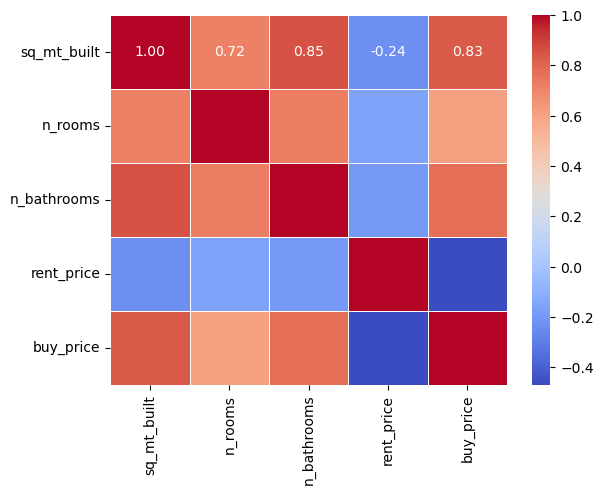

In [60]:
#korelasyon matrisine bakalım
columns_of_interest = ['sq_mt_built', 'n_rooms','n_bathrooms','rent_price','buy_price']
# Seçilen sütunlar için korelasyon matrisini hesaplama
corr_matrix = df[columns_of_interest].corr()
# Korelasyon matrisini görselleştirme
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasyon Matrisi')
plt.show()

In [61]:
# # Boş veriler içeren satırları silme (makine öğrenmesi adımında hata verdiği için)
df = df.dropna()

In [62]:
#SVM makine öğrenmesi modeli oluşturma
X = df.drop('buy_price', axis=1)  # Özellikler (bağımsız değişkenler)
y = df['buy_price']  # Etiket (bağımlı değişken)

In [71]:
#Veriyi Eğitim ve Test Setlerine Ayırma
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [73]:
#SVM Modelini Oluşturma ve Eğitme
from sklearn.svm import SVC

In [74]:
# Modeli oluşturun
model = SVC()

In [75]:
# Modeli eğitim verisi ile eğitin
model.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [76]:
#Modeli Test Etme
# Test verisi üzerinde tahmin yapma
y_pred = model.predict(X_test)

NameError: name 'X_test' is not defined

In [77]:
# Sonuçları değerlendirme
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

NameError: name 'y_test' is not defined